In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_kreisdiagramm(ms, R2, R1):
    # ____________________________________________
    #Maßstäbe:
    X0 = X_0 *ms
    XK = X_K *ms
    print("X_0: ",X0)
    print("X_K: ",XK)
    # ____________________________________________
    # Kreisberechnung
    leistungsl = XK-X0
    #print(leistungsl)
    # Berechnung des Mittelpunktes des Kreises:
    leistungsl_betrag = math.sqrt(leistungsl[0]**2+leistungsl[1]**2)
    #print(leistungsl_betrag)
    # Winkel zwischen Mittellinie und Leistungslinie
    a = leistungsl/2 + X0
    hilf_g = a[1]-X0[1]
    #print(hilf_g)
    hilf_winkel = math.acos(hilf_g/(leistungsl_betrag/2)) # in Rad- for Deg: *180/math.pi
    #print(hilf_winkel)
    mittelpunkt_x = leistungsl_betrag/(2*math.cos(hilf_winkel))
    #print(mittelpunkt_x)
    mittelpunkt = np.array([X0[1]+mittelpunkt_x, X0[0]])
    print("Mittelpunkt: [{:.3f},{:.3f}]".format(float(mittelpunkt[0]),float(mittelpunkt[1])))
    #print(mittelpunkt_x)
       
#___________________________________________________    
# Plotting:
    fig = plt.figure(figsize = (13,10))
    ax = fig.add_subplot(111)
    # Leistungslinie
    plt.plot([X0[1], XK[1]], [X0[0], XK[0]], marker = 'o',color=np.random.random(3))
    ax.annotate("  X_0 / S = 0", xy=(X0[1],X0[0]))
    ax.annotate("  X_K / S = 1", xy=(XK[1],XK[0]))
    ax.text(leistungsl[1]/2, leistungsl[0]/2, "Leistungslinie", ha="center", va="center", 
            rotation=hilf_winkel*180/math.pi,
            size=10)
#___________________________________________________
    # Momentenlinie
    alpha_m = math.atan(R1/(XK[1]-X0[1]))
    #print(alpha_m*180/math.pi)
    s_oox = math.cos(alpha_m)*((mittelpunkt_x)*2)
    s_ooy = math.sin(alpha_m)*((mittelpunkt_x)*2)
    # Längenabzug durch Kreiskrümmung:
    x_abzug = math.tan(alpha_m)*s_ooy
    y_abzug = math.sin(alpha_m)*x_abzug
    plt.plot([X0[1], s_oox+X0[1]-(x_abzug/2)], [X0[0], s_ooy+X0[0]-(y_abzug/2)], marker = 'o',color=np.random.random(3))
    ax.text((s_oox-X0[1])/2, 0.6*s_ooy+X0[0], "Momentenlinie", ha="center", va="center", 
            rotation=alpha_m*180/math.pi,
            size=10)
    ax.annotate("  S→oo", xy=(s_oox+X0[1]-(x_abzug/2),s_ooy+X0[0]-(y_abzug/2)))
    print("S→oo: [{:.3f},{:.3f}]".format(float(s_oox+X0[1]-(x_abzug/2)),float(s_ooy+X0[0]-(y_abzug/2))))
#___________________________________________________
    # Hilfsmittellinie
    plt.axhline(y=X0[0], color=np.random.random(3), linestyle='--')
    # Kreisdiagramm
    ax.plot(mittelpunkt[0],mittelpunkt[1],"o", color=np.random.random(3))
    ax.annotate("  M", xy=(mittelpunkt[0],mittelpunkt[1]))
    circle = plt.Circle(mittelpunkt, mittelpunkt_x, color=np.random.random(3), fill=False)
    ax.add_artist(circle)
#___________________________________________________
    # Plot Widerstandslinie
    plt.plot([XK[1], XK[1]], [X0[0], XK[0]], marker = 'o', color=np.random.random(3))
    ax.plot(XK[1], X0[0]+R1, marker = 'o', color=np.random.random(3))
    ax.annotate("  R2/R1",xy =(XK[1], X0[0]+R1) )
    #ax.annotate('R`' , xy=(0.5, 0.90), ha='center', va='bottom',
    #        rotation=90,
    #        arrowprops=dict(arrowstyle='-[, widthB=7.0, lengthB=1.5', lw=2.0,rotation = 90))
#___________________________________________________            
    # Diagramm Dimensionen und Beschriftung
    plt.title("Kreisdiagramm")
    plt.xlim(0, 20)    # 0,20
    plt.ylim(-7, 10)
    ax.set_ylabel("Re – pro Einheit {} A".format(1/ms))
    ax.set_xlabel("-Im – pro Einheit {} A".format(1/ms))
    plt.grid()

# Angabe der Maschinenwerte:

In [6]:
P_N = 5800 #6000
P_0 = 350 
P_K = 22000
U_N = 380 # 400
I_10 = 6.2
I_K = 73.5
R_1 = 0.51
#Strommaßstab:
ms = 1/5
# Berechnung von U_1, cos(phi), X_0 und X_K
U_1 = U_N/(math.sqrt(3))
# Berechnung von X_0
phi_10 = math.acos((1/3.* P_0)/(U_1*I_10))  # in Rad - for Deg *(180/math.pi)
I_w0 = I_10 * math.cos(phi_10)
I_b0 = I_10 * math.sin(phi_10)
X_0 = np.array([I_w0,I_b0])
# Berechnung von X_K
phi_K = math.acos((1/3.* P_K)/(U_1*I_K))  # in Rad - for Deg *(180/math.pi)
I_wK = I_K * math.cos(phi_K)
I_bK = I_K * math.sin(phi_K)
X_K = np.array([I_wK,I_bK])

## Berechnung der Widerstände:

In [7]:
# Punkt X_oo und Widerstände Berechnen
R_K = P_K/(3*I_K**2)
R_2s = R_K - R_1
# Maßstab für R:
ms_r = (I_wK -I_w0)*ms
# Widerstände Maßstabsgetreu:
R_2ms = ms_r * (R_2s/R_K)
R_1ms = ms_r *(R_1/R_K)

X_0:  [0.106354   1.23543062]
X_K:  [ 6.68510838 13.09195654]
Mittelpunkt: [8.989,0.106]
S→oo: [16.086,3.204]


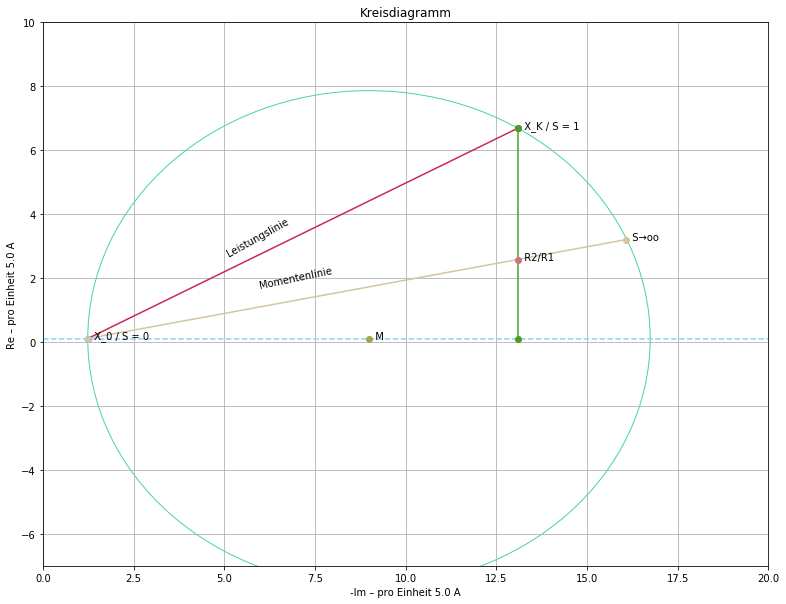

In [11]:
plot_kreisdiagramm(ms, R_2ms, R_1ms)